___
# Apprentissage par Régression logistique avec Python 

Pour ce TP, nous nous intéressons au domaine de la publicité où la table de données utilisée est relative à un échantillon d'internautes. Pour chaque internaute, on dispose d'informations sensées expliquer s'il va consulter ou non une annonce publicitaire se trouvant sur le site Web d'une entreprise de ventes en ligne. L'objectif est de créer un modèle permettant de prédire, pour tout nouvel internaute consultant ce site web, s'il va consulter ou non sur une annonce publicitaire en fonction des caractéristiques de cet interneute.

Cette table de données ("Publicités") contient les caractéristiques suivantes :

* 'Duree': la durée en minutes de connexion par jour de l'internaute sur le site web de l'entreprise.
* 'Age': l'âge de l'internaute en année.
* 'Revenu_moyen': le revenu moyen des résidents de la zone géographique où habite l'internaute.
* 'Duree_internet': la durée moyenne par jour de connexion de l'internaute à internet.
* 'Titre': le titre de la publicité.
* 'Ville': la ville de l'internaute.
* 'Genre': l'internaute est un homme ou non (1=homme, 0=femme).
* 'Pays': Pays de l'internaute.
* 'Heure_clique': l'heure à laquelle l'internaute a consulté sur l'annonce publicitaire ou fermé la fenêtre.
* 'Clique': 1 si l'internaute consulte l'annonce publicitaire et 0 sinon

1.	Faites l’étude descriptive des données de la table « Publicites ». Interprétez les résultats obtenus.
2.	Faites l’étude de la dépendance linéaire entre les caractéristiques de la table « Publicites ». Interprétez les résultats obtenus.
3.	Trouver le meilleur modèle de régression permettant de modéliser la variable indiquant si l’internaute clique sur la publicité ou non en fonction ses autres caractéristiques de la table « Publicites ».
4.	Calculer la prédiction de cliquer ou non sur la publicité pour un internaute femme qui s’est connectée 1 heure sur le site web de l’entreprise, âgée de 30 ans, habitant dans une zone géographique dont le revenu moyen est 100000 et dont la durée moyenne par jour de connexion à internet est 1 h 30 minutes. 


### Importation des librairies
Pour pouvoir mettre en oeuvre l'apprentissage par régression logistique, nous commencons par l'importation des librairies Python dont on aura besoin.
* pandas : c'est la librairie de référence pour la manipulation des tables de données.
* numpy  : destinée à manipuler des matrices ou tableaux multidimensionnels ainsi que des fonctions mathématiques opérant sur ces tableaux.
* matplotlib.pyplot : Matplotlib est une librairie destinée à tracer et visualiser des données sous formes de graphiques.
* seaborn : est une librairie de Data Visualization qui vient s'ajouter à Matplotlib en remplacant certains réglages par défaut et fonctions tout en lui ajoutant de nouvelles fonctionnalités.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importation et affichage des données de la table

In [36]:
# Importation de la table de données

Publicite = pd.read_csv('Publicites.csv')

In [37]:
# Affichage des cinq premières lignes de la table de données.

Publicite.head()

,Duree,Age,Revenu_moyen,Duree_internet,Titre,Ville,Genre,Pays,Heure_clique,Clique
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


## Etude descriptive des données de la table

In [38]:
Publicite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Duree           1000 non-null   float64
 1   Age             1000 non-null   int64  
 2   Revenu_moyen    1000 non-null   float64
 3   Duree_internet  1000 non-null   float64
 4   Titre           1000 non-null   object 
 5   Ville           1000 non-null   object 
 6   Genre           1000 non-null   int64  
 7   Pays            1000 non-null   object 
 8   Heure_clique    1000 non-null   object 
 9   Clique          1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


Apparemment, il n'y a pas de valeurs manquantes. Mais les valeurs manquantes peuvent être cachées. L'analyse exploratoire des données nous donnera beaucoup plus d'informations sur les données.

In [39]:
# Nombre de valeurs uniques  par colonne

Publicite.nunique()

Duree              900
Age                 43
Revenu_moyen      1000
Duree_internet     966
Titre             1000
Ville              969
Genre                2
Pays               237
Heure_clique      1000
Clique               2
dtype: int64

## <font color=#3876C2> Analyse exploratoire des données</font> <a name="M3"></a>

Commençons notre exploratoire des données en traçant un graphique de visualisation de la distribution de chaque variable.

In [40]:
# Variables catégorielles

categorical_columns = Publicite.nunique()[Publicite.nunique() < 3].keys().to_list()

categorical_columns

['Genre', 'Clique']

In [44]:
# Création d'une fonction de construction de graphiques à barres et de manière interactive

def bar_plot(a):
  Publicite[a].value_counts(normalize = True).plot(kind = 'bar')
  plt.ylabel('proportion')
  plt.title('Distribution de ' + str(a))
  return plt.show()

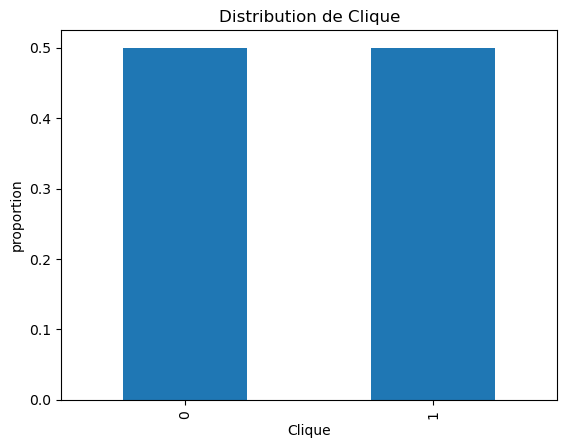

In [45]:
bar_plot('Clique')

In [46]:
#Interact
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

interact(bar_plot, a = categorical_columns);

interactive(children=(Dropdown(description='a', options=('Genre', 'Clique'), value='Genre'), Output()), _dom_c…

In [47]:
# Variables quantitatives

numerical_columns = ['Duree', 'Age', 'Revenu_moyen', 'Duree_internet']

# Création d'une fonction de construction d'histogrammes et de manière interactive

def hist_plot(b):
  sns.distplot(Publicite[b], kde=False)
  plt.title('Histogram de '+str(b))
  return plt.show()::

C:\Users\Dell\AppData\Local\Temp\ipykernel_7216\2880451436.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Publicite[b], kde=False)


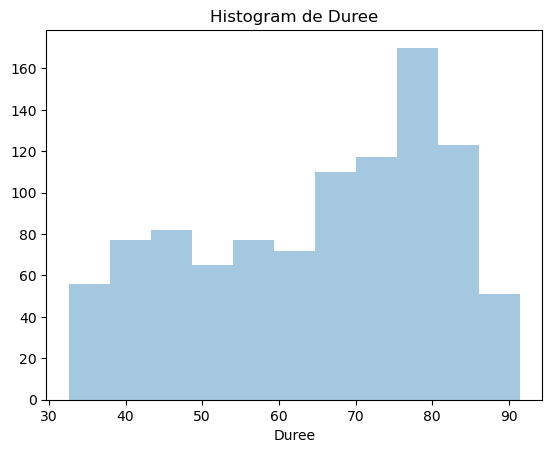

In [48]:
hist_plot('Duree')

In [49]:
#Interact

interact(hist_plot, b = numerical_columns);

interactive(children=(Dropdown(description='b', options=('Duree', 'Age', 'Revenu_moyen', 'Duree_internet'), va…

In [50]:
# Coefficient d'asymétrie de la variable 'Age'

Publicite['Age'].skew()


0.4791416884125751

In [51]:
# Création d'une fonction de construction de boîtes à moustaches et de manière interactive

def box_plot(b):
  sns.boxplot(y = Publicite[b])
  plt.title('Boxplot de ' + str(b))
  return plt.show()

#Interact

interact(box_plot, b = numerical_columns);

interactive(children=(Dropdown(description='b', options=('Duree', 'Age', 'Revenu_moyen', 'Duree_internet'), va…

Il existe de nombreuses autres analyses que nous pouvons faire. 

Passons au résumé statistique. 

In [52]:
Publicite.describe()

,Duree,Age,Revenu_moyen,Duree_internet,Genre,Clique
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


Nous avons une compréhension de la distribution de chaque variable dans notre jeu de données. 

Maintenant, faisons des analyse bivariées. 

### Etude de la dépedance entre les variables de la table "Publicite"

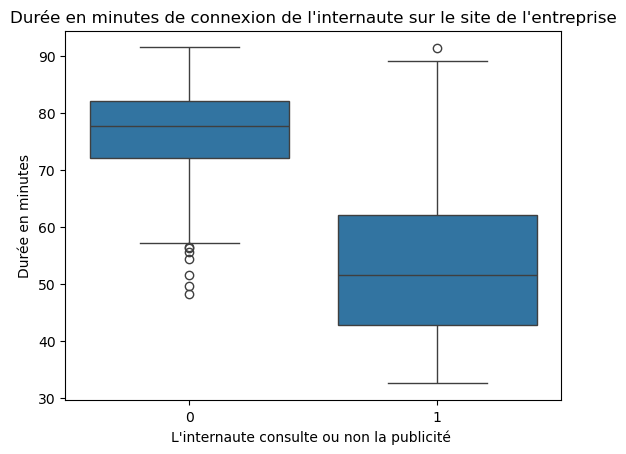

In [53]:
# Duree VS Clique 

sns.boxplot(x='Clique', y='Duree', data=Publicite)
plt.xlabel("L'internaute consulte ou non la publicité ")
plt.ylabel('Durée en minutes')
plt.title("Durée en minutes de connexion de l'internaute sur le site de l'entreprise")
plt.show()

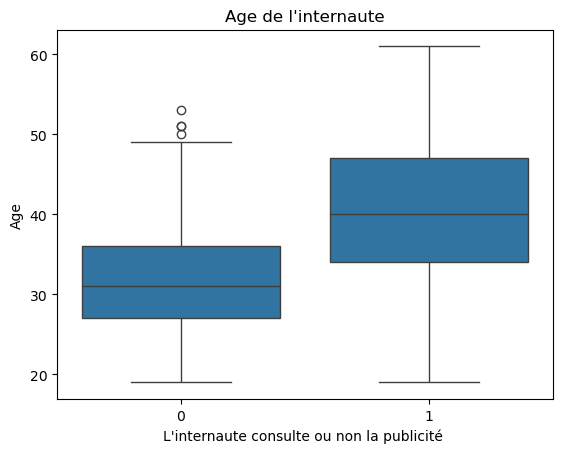

In [54]:
# Age VS Clique 

sns.boxplot(x='Clique', y='Age', data=Publicite)
plt.xlabel("L'internaute consulte ou non la publicité ")
plt.ylabel('Age')
plt.title("Age de l'internaute")
plt.show()

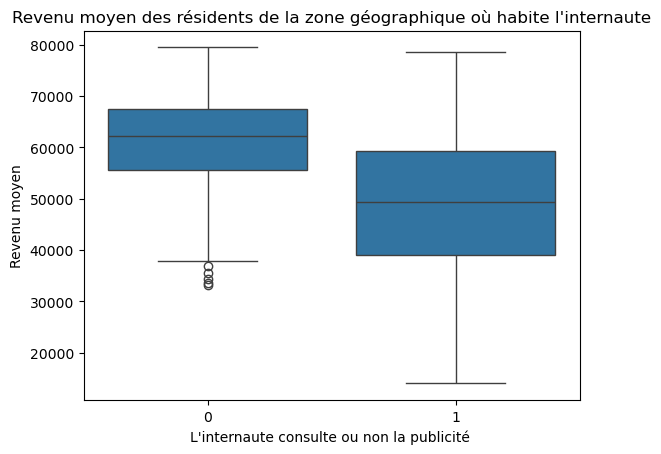

In [55]:
# Age VS Clique 

sns.boxplot(x='Clique', y='Revenu_moyen', data=Publicite)
plt.xlabel("L'internaute consulte ou non la publicité ")
plt.ylabel('Revenu moyen')
plt.title("Revenu moyen des résidents de la zone géographique où habite l'internaute")
plt.show()

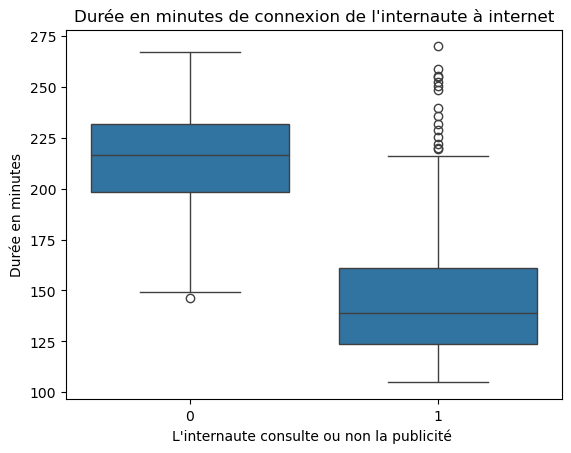

In [56]:
# Duree VS Clique 

sns.boxplot(x='Clique', y='Duree_internet', data=Publicite)
plt.xlabel("L'internaute consulte ou non la publicité ")
plt.ylabel('Durée en minutes')
plt.title("Durée en minutes de connexion de l'internaute à internet")
plt.show()

In [57]:
# Graphique représentant le lien entre le revenu moyen et l'âge

sns.jointplot(x='Age',y='Revenu_moyen',data=Publicite)

In [58]:
# Graphique représentant le lien entre la durée de connexion sur le site web de l'entreprise et l'âge

sns.jointplot(x='Age',y='Duree',data=Publicite,color='red')

In [59]:
# Graphique représentant le lien entre la durée de connexion sur le site web et celle de connexion par jour à internet
sns.jointplot(x='Age',y='Duree',data=Publicite,color='green')

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

In [60]:
# Graphique du lien entre les caractéristiques de la table "Publicite" et leur distribution observée 
# pour les interneutes ayant cliqué sur la publicité et ceux n'ayant pas cliqué

sns.pairplot(Publicite,hue='Clique',palette='bwr')

# Apprentissage par régression logistique 

Pour ce qui suit, nous allons entraîner notre modèle de régression logistique. Pour cela, nous devrons d'abord diviser nos données en un tableau X contenant les caractéristiquesaîner et un tableau Y contenant la variable cible qui est dans notre cas la colonne 'Clique'. 

In [61]:
X = Publicite[['Duree', 'Age', 'Revenu_moyen','Duree_internet', 'Genre']]
y = Publicite['Clique']

**** Echantillons d'Apprentissage et de Test****

On va séparer maintenant les données en un échantillon d'apprentissage (80%) et un échantillon de test (20%). Nous allons entraîner le modèle sur l'échantillon d'apprentissage, puis utiliser l'échantillon de test pour évaluer le modèle.


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Elaboration et entrainement du modèle logistique

In [33]:
from sklearn.linear_model import LogisticRegression

In [35]:
# Détermination des hyperparamètres

from sklearn.model_selection import GridSearchCV

# Dictionnaire des hyperparamètres

param_grid = {'C':[0.001, 0.01, 1, 10, 50, 100, 500]}

# Objet GridSearchCV

grid_logreg_class = GridSearchCV(estimator=LogisticRegression(random_state=1000, max_iter=500), 
                                 param_grid=param_grid, 
                                 scoring='f1', 
                                 cv=5)

# Entraînement de l'algorithme

logreg_model = grid_logreg_class.fit(X_train, y_train)

# Meilleur score et meilleur hyperparamètre

print(round(logreg_model.best_score_, 3))

print(logreg_model.best_estimator_)

0.91
LogisticRegression(C=10, max_iter=500, random_state=1000)


In [36]:
logmodel = LogisticRegression(C=10)
logmodel.fit(X_train,y_train)

LogisticRegression(C=10)

# Predictions et Evaluations

In [25]:
predictions = logmodel.predict(X_test)

**Evaluation de la performance du modèle**

**Quelle métrique choisir pour évaluer la performance des modèles ?**

Vous devez préalablement comprendre ce qu'on appelle matrice de confusion.

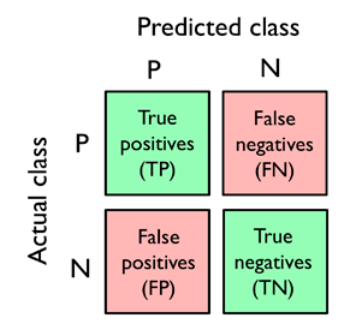

# La matrice de confusion est une matrice carrée qui rapporte le nombre de vrais positifs (*True Positives* ou TP), vrais négatifs (*True Négatives* ou TN), faux positifs (*False Positive* ou FP) et faux négatifs (*False Negatives* ou FN).

Dans notre cas, le positif c'est 1 : l'internaute a consulté l'annonce publicitaire et 
le négatif c'est 0 : l'internaute n'a pas consulté l'annonce publicitaire.

* **TP** : l'internaute a consulté l'annonce publicitaire et le modèle prédit qu'il l'a consulté ;

* **TN** : l'internaute n'a pas consulté l'annonce publicitaire et le modèle prédit qu'il ne l'a pas consulté.

Les 2 cas ci-dessus (TP et TN) sont les bons cas. Mais FP et FN sont les mauvais cas :

* **FP** : l'internaute n'a pas consulté l'annonce publicitaire et le modèle prédit qu'il l'a consulté ;

* **FN** : l'internaute a consulté l'annonce publicitaire et le modèle prédit qu'il ne l'a consulté.

Les choix de métrique : https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

* **accuracy** : La précision globale du modèle (***Accuracy*** en anglais) est la proportion de prévisions correctes, c'est-à-dire la somme du nombre de vrais négatifs et de vrais positifs divisée par le nombre total des observations. Elles se calcule donc par la formule ci-dessous : 

$$Accuracy = \frac{TN + TP}{(TN + FN + FP + TP}$$

Il faut faire attention à la précision globale. Une forte précision globale ne signifie pas forcément que le modèle est performant. Le choix de la métrique pour quantifier la performance du modèle doit se faire en fonction du contexte de l'étude, c'est-à-dire de la problématique qu'on veut résoudre.

Lorsqu'il y a un problème de déséquilibre de classe, la précision globale n'est pas une bonne métrique d'évaluation de la performance du modèle.

*precision* et *recall* sont des métriques très utilisées surtout lorsque les classes de la variable cible sont très déséquilibrées.

* **precision** : La précision est l'indicateur qui vous indique, sur tous les points positifs prédits, combien étaient de vrais positifs. 

$$Precision = \frac{TP}{(TP + FP)}$$


* **recall** : cette métrique montre la capacité du modèle à identifier tous les vrais positifs. 

$$Recall = \frac{TP}{(TP + FN)}$$


L'amélioration de *precision* diminue *recall* et vice-versa. Alors que faire ? 

Fort heureusement, il y a une métrique qui contient à la fois la sensibilité et la spécificité. C'est le F1 score.

* **F1 score** : Moyenne harmonique de ***precision*** et de ***recall***. Elle se calcule donc par la formule : $$F1 score = 2 * \frac{precision * recall}{precision + recall}$$

Pour un modèle parfait, f1 score est égal à 1 et la plus mauvaise performance est un modèle avec un f1 score égal à O.

Nous choississons le F1 score pour évaluer la performance de chaque modèle qui sera construit.

In [26]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89        89
           1       0.96      0.86      0.90       111

    accuracy                           0.90       200
   macro avg       0.90      0.91      0.90       200
weighted avg       0.91      0.90      0.90       200



**Prédiction pour un nouvel interneute**

In [28]:
## Prédiction pour une nouvelle entrée de ['Duree', 'Age', 'Revenu_moyen','Duree_internet', 'Genre']
x_new = np.array([[60, 30, 100000, 210,0]])


In [29]:
print(x_new)

[[    60     30 100000    210      0]]


In [30]:
Clique_pred = logmodel.predict(x_new)
print(Clique_pred)

[0]


tester si les données sont linéairement séparable

In [ ]:
# Détermination des hyperparamètres pour LDA

from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Dictionnaire des hyperparamètres
param_grid_lda = {'solver': ['svd', 'lsqr', 'eigen']}

# Objet GridSearchCV
grid_lda = GridSearchCV(
    estimator=LinearDiscriminantAnalysis(),
    param_grid=param_grid_lda,
    scoring='f1',
    cv=5
)

# Entraînement de l'algorithme
lda_model = grid_lda.fit(X_train, y_train)

# Meilleur score et meilleur hyperparamètre
print("Meilleur score (F1):", round(lda_model.best_score_, 3))
print("Meilleur modèle:", lda_model.best_estimator_)

In [ ]:
# Entraînement du modèle avec le meilleur hyperparamètre
best_solver = lda_model.best_estimator_.solver
final_lda_model = LinearDiscriminantAnalysis(solver=best_solver)
final_lda_model.fit(X_train, y_train)

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
# Détermination des hyperparamètres pour QDA

from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Dictionnaire des hyperparamètres
param_grid_qda = {'reg_param': [0.0, 0.1, 0.2, 0.5, 0.7, 1.0]}

# Objet GridSearchCV
grid_qda = GridSearchCV(
    estimator=QuadraticDiscriminantAnalysis(),
    param_grid=param_grid_qda,
    scoring='f1',
    cv=5
)

# Entraînement de l'algorithme
qda_model = grid_qda.fit(X_train, y_train)

# Meilleur score et meilleur hyperparamètre
print("Meilleur score (F1):", round(qda_model.best_score_, 3))
print("Meilleur modèle:", qda_model.best_estimator_)

In [ ]:
# Entraînement du modèle avec le meilleur hyperparamètre
best_reg_param = qda_model.best_estimator_.reg_param
final_qda_model = QuadraticDiscriminantAnalysis(reg_param=best_reg_param)
final_qda_model.fit(X_train, y_train)

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
# Détermination des hyperparamètres pour SVM

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Dictionnaire des hyperparamètres
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Objet GridSearchCV
grid_svm = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid_svm,
    scoring='f1',
    cv=5
)

# Entraînement de l'algorithme
svm_model = grid_svm.fit(X_train, y_train)

# Meilleur score et meilleur hyperparamètre
print("Meilleur score (F1):", round(svm_model.best_score_, 3))
print("Meilleur modèle:", svm_model.best_estimator_)

In [ ]:
# Entraînement du modèle avec les meilleurs hyperparamètres
best_params = svm_model.best_params_
final_svm_model = SVC(C=best_params['C'], kernel=best_params['kernel'], gamma=best_params['gamma'])
final_svm_model.fit(X_train, y_train)

In [ ]:
print(classification_report(y_test,predictions))